In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
web = pd.read_excel('/content/drive/MyDrive/Cours/Projet 5/Notebook/web.xlsx')
erp = pd.read_excel('/content/drive/MyDrive/Cours/Projet 5/Notebook/erp.xlsx')
liaison = pd.read_excel('/content/drive/MyDrive/Cours/Projet 5/Notebook/liaison.xlsx')

/usr/local/lib/python3.8/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


#Nettoyage et préparation des fichiers

##Renomer la colonne id_web du fichier liaison pour faciliter la fusion

In [3]:
liaison.rename(columns ={'id_web':'sku'}, inplace = True)

## Nettoyage du DF "erp":

In [4]:
erp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    int64  
 1   onsale_web      825 non-null    int64  
 2   price           825 non-null    float64
 3   stock_quantity  825 non-null    int64  
 4   stock_status    825 non-null    object 
dtypes: float64(1), int64(3), object(1)
memory usage: 32.4+ KB


Le type de la colonne 'product_id' est un interger, or il vaut mieux qu'il soit catégorisé comme objet pour éviter que certaines lignes de codes itèrent dessus.

In [5]:
erp['product_id'] = erp['product_id'].astype('object')

In [6]:
erp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    object 
 1   onsale_web      825 non-null    int64  
 2   price           825 non-null    float64
 3   stock_quantity  825 non-null    int64  
 4   stock_status    825 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 32.4+ KB


La colonne product_id va être utilisée pour réaliser la liaison, il faut s'assurer qu'il n'y a pas de doublons.

In [7]:
erp['product_id'].nunique()

825

## Nettoyage du DF "web":


In [31]:
web['sku'] = web['sku'].astype('category')

In [8]:
web.head()

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


Etape 1 : suppression des colonnes sans aucunes données

In [9]:
web = web.dropna(axis = 1, how='all')

In [10]:
web.head()

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,post_author,post_date,post_date_gmt,...,ping_status,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,1.0,2018-06-01 13:53:46,2018-06-01 11:53:46,...,closed,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,...,closed,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,2.0,2018-02-08 13:49:41,2018-02-08 12:49:41,...,closed,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,2.0,2018-02-08 14:08:36,2018-02-08 13:08:36,...,closed,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,2.0,2018-02-09 14:01:05,2018-02-09 13:01:05,...,closed,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


Etape 2 : Vérifier si certaines colonnes ne contiennent pas toutes la même valeur


In [11]:
liste = []
for i in web:
  if web[i].nunique() ==1:
    liste.append(i)
web.drop(columns = liste, inplace= True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [12]:
web.head()

,sku,total_sales,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_name,post_modified,post_modified_gmt,guid,post_type
0,bon-cadeau-25-euros,10.0,1.0,2018-06-01 13:53:46,2018-06-01 11:53:46,Bon cadeau de 25€,"<span style=""color: #a85253;""><strong>Parlons ...",bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,https://www.bottle-neck.fr/?post_type=product&...,product
1,15298,6.0,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre f...",pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,https://www.bottle-neck.fr/?post_type=product&...,product
2,15296,0.0,2.0,2018-02-08 13:49:41,2018-02-08 12:49:41,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Les vieilles vignes lui apportent une rare pro...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,https://www.bottle-neck.fr/?post_type=product&...,product
3,15300,0.0,2.0,2018-02-08 14:08:36,2018-02-08 13:08:36,Pierre Jean Villa Crozes-Hermitage Accroche Co...,"Dentelle de fruit de jeunes syrah, aux tanins ...",pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,https://www.bottle-neck.fr/?post_type=product&...,product
4,19814,3.0,2.0,2018-02-09 14:01:05,2018-02-09 13:01:05,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,Gamine représente tout le fruité et la gourman...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,https://www.bottle-neck.fr/?post_type=product&...,product


Etape 3 : Suppression des lignes où le 'sku' est vide car risque de créer des erreurs.

Ces données seront d'abord stockées dans un dataFrame à part, aux cas où il soit possible de recouper ces données avec des 'product_id' sans correspondance de 'liaison'.

In [13]:
sku_manquants = web.loc[web['sku'].isna()].copy()

In [14]:
sku_manquants.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85 entries, 178 to 796
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   sku                0 non-null      object        
 1   total_sales        2 non-null      float64       
 2   post_author        2 non-null      float64       
 3   post_date          2 non-null      datetime64[ns]
 4   post_date_gmt      2 non-null      datetime64[ns]
 5   post_title         2 non-null      object        
 6   post_excerpt       2 non-null      object        
 7   post_name          2 non-null      object        
 8   post_modified      2 non-null      datetime64[ns]
 9   post_modified_gmt  2 non-null      datetime64[ns]
 10  guid               2 non-null      object        
 11  post_type          2 non-null      object        
dtypes: datetime64[ns](4), float64(2), object(6)
memory usage: 8.6+ KB


In [15]:
sku_manquants.head()

,sku,total_sales,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_name,post_modified,post_modified_gmt,guid,post_type
178,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaT,NaT,NaN,NaN
179,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaT,NaT,NaN,NaN
227,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaT,NaT,NaN,NaN
230,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaT,NaT,NaN,NaN
231,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaT,NaT,NaN,NaN


In [16]:
sku_manquants.dropna(axis =0, how='all', inplace=True)

In [17]:
sku_manquants.head()

,sku,total_sales,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_name,post_modified,post_modified_gmt,guid,post_type
470,NaN,0.0,2.0,2018-07-31 12:07:23,2018-07-31 10:07:23,Pierre Jean Villa Côte Rôtie Fongeant 2017,"Fongeant 2017 explose sur un fruit brillant, p...",pierre-jean-villa-cote-rotie-fongeant-2017,2019-11-02 13:24:15,2019-11-02 12:24:15,https://www.bottle-neck.fr/?post_type=product&...,product
471,NaN,0.0,2.0,2018-08-08 11:23:43,2018-08-08 09:23:43,Pierre Jean Villa Condrieu Jardin Suspendu 2018,"<span id=""u1194-83"">Le nez séduit par ses parf...",pierre-jean-villa-condrieu-suspendu-2018,2019-11-02 13:24:01,2019-11-02 12:24:01,https://www.bottle-neck.fr/?post_type=product&...,product


La majorité des lignes dont le 'sku' est Nan ne contiennent aucunes valeurs, il n'est donc pas utiles de conserver ces données. Il faut donc voir si on peut retrouver leur 'sku'.

Etape 4 : compléter les "sku" manquants:
L'idée est de comparer le "post_title" au reste du DF, pour vérifier s'il ne s'agit pas de doublons déjà renseignées.

In [18]:
liste = sku_manquants['post_title'].to_list()

In [19]:
temp = web.iloc[:0,:]
for i in liste:
  x= web.loc[web['post_title']==i,:]
  temp = pd.concat([temp,x])

In [20]:
temp.head()

,sku,total_sales,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_name,post_modified,post_modified_gmt,guid,post_type
470,NaN,0.0,2.0,2018-07-31 12:07:23,2018-07-31 10:07:23,Pierre Jean Villa Côte Rôtie Fongeant 2017,"Fongeant 2017 explose sur un fruit brillant, p...",pierre-jean-villa-cote-rotie-fongeant-2017,2019-11-02 13:24:15,2019-11-02 12:24:15,https://www.bottle-neck.fr/?post_type=product&...,product
471,NaN,0.0,2.0,2018-08-08 11:23:43,2018-08-08 09:23:43,Pierre Jean Villa Condrieu Jardin Suspendu 2018,"<span id=""u1194-83"">Le nez séduit par ses parf...",pierre-jean-villa-condrieu-suspendu-2018,2019-11-02 13:24:01,2019-11-02 12:24:01,https://www.bottle-neck.fr/?post_type=product&...,product


C'est deux individus n'apparaissent pas à d'autres endroits dans le DataFrame "web". Il n'est donc pas possible de retrouver leurs "sku". 

Etape 5: suppression des lignes sans 'sku'.

In [21]:
web.dropna(axis = 0, inplace = True, subset=['sku'])

In [22]:
web.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1428 entries, 0 to 1512
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   sku                1428 non-null   object        
 1   total_sales        1428 non-null   float64       
 2   post_author        1428 non-null   float64       
 3   post_date          1428 non-null   datetime64[ns]
 4   post_date_gmt      1428 non-null   datetime64[ns]
 5   post_title         1428 non-null   object        
 6   post_excerpt       714 non-null    object        
 7   post_name          1428 non-null   object        
 8   post_modified      1428 non-null   datetime64[ns]
 9   post_modified_gmt  1428 non-null   datetime64[ns]
 10  guid               1428 non-null   object        
 11  post_type          1428 non-null   object        
dtypes: datetime64[ns](4), float64(2), object(6)
memory usage: 145.0+ KB


Etape 6 : contrôle et suppression des doublons.

In [32]:
web.sort_values('sku')

,sku,total_sales,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_name,post_modified,post_modified_gmt,guid,post_type
339,38,38.0,2.0,2018-04-18 12:25:58,2018-04-18 10:25:58,Emile Boeckel Crémant Brut Blanc de Blancs,"Ce Crémant est vif et délicat, gourmand et cro...",emile-boeckel-cremant-brut-blanc-de-blancs,2020-08-27 17:15:03,2020-08-27 15:15:03,https://www.bottle-neck.fr/?post_type=product&...,product
1123,38,38.0,2.0,2018-04-18 12:25:58,2018-04-18 10:25:58,Emile Boeckel Crémant Brut Blanc de Blancs,NaN,emile-boeckel-cremant-brut-blanc-de-blancs,2020-08-27 17:15:03,2020-08-27 15:15:03,https://www.bottle-neck.fr/wp-content/uploads/...,attachment
1060,41,0.0,2.0,2018-04-14 12:01:43,2018-04-14 10:01:43,Marcel Windholtz Eau de Vie de Marc de Gewurzt...,NaN,marcel-windholtz-eau-de-marc-de-gewurztraminer,2020-08-03 10:25:02,2020-08-03 08:25:02,https://www.bottle-neck.fr/wp-content/uploads/...,attachment
269,41,0.0,2.0,2018-04-14 12:01:43,2018-04-14 10:01:43,Marcel Windholtz Eau de Vie de Marc de Gewurzt...,Les eaux de vie naissent d'une subtile alchimi...,marcel-windholtz-eau-de-marc-de-gewurztraminer,2020-08-03 10:25:02,2020-08-03 08:25:02,https://www.bottle-neck.fr/?post_type=product&...,product
70,304,40.0,2.0,2018-02-13 12:57:44,2018-02-13 11:57:44,Champagne Gosset Grande Réserve,"Le nez, ouvert et expressif, évoque les fruits...",gosset-champagne-grande-reserve,2020-08-27 11:25:02,2020-08-27 09:25:02,https://www.bottle-neck.fr/?post_type=product&...,product
...,...,...,...,...,...,...,...,...,...,...,...,...
527,19822,0.0,2.0,2018-11-26 10:59:10,2018-11-26 09:59:10,Tempier Bandol Cabassaou 2017,"<div id=""wrapper"">\n<div id=""container-wrapper...",tempier-bandol-cabassaou-2017,2020-01-04 13:57:04,2020-01-04 12:57:04,https://www.bottle-neck.fr/?post_type=product&...,product
797,13127-1,0.0,2.0,2020-06-09 15:42:04,2020-06-09 13:42:04,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,"Nez gracieux, très élégant avec une touche flo...",clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,https://www.bottle-neck.fr/?post_type=product&...,product
1511,13127-1,0.0,2.0,2020-06-09 15:42:04,2020-06-09 13:42:04,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,NaN,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,https://www.bottle-neck.fr/wp-content/uploads/...,attachment
1209,bon-cadeau-25-euros,10.0,1.0,2018-06-01 13:53:46,2018-06-01 11:53:46,Bon cadeau de 25€,NaN,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,https://www.bottle-neck.fr/wp-content/uploads/...,attachment


On constate qu'il existe des doublons dans la colonnes 'sku'.

Dans la colonne "post_type" on constate que pour les 'sku' en double une ligne est libellée "product" et l'autre "attachment". Seuls les produits nous intéressent, il convient donc de supprimer l'ensemble des lignes référencées comme "attachment" dans la colonne "post_type".

In [37]:
liste = web.loc[web['post_type']== "attachment",].index

In [38]:
web.drop(liste, axis = 0, inplace = True)

In [39]:
web.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 798
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   sku                714 non-null    category      
 1   total_sales        714 non-null    float64       
 2   post_author        714 non-null    float64       
 3   post_date          714 non-null    datetime64[ns]
 4   post_date_gmt      714 non-null    datetime64[ns]
 5   post_title         714 non-null    object        
 6   post_excerpt       714 non-null    object        
 7   post_name          714 non-null    object        
 8   post_modified      714 non-null    datetime64[ns]
 9   post_modified_gmt  714 non-null    datetime64[ns]
 10  guid               714 non-null    object        
 11  post_type          714 non-null    object        
dtypes: category(1), datetime64[ns](4), float64(2), object(5)
memory usage: 90.1+ KB


In [90]:
web['sku'].nunique()

714

Une fois cette dernière suppression faite il n'y a plus de doublons dans la colonne "sku". 

## Chercher les valeurs manquantes de "liaison" dans "erp"

In [40]:
display(liaison)

,product_id,sku
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815
...,...,...
820,7203,NaN
821,7204,NaN
822,7247,13127-1
823,7329,14680-1


Il faut dans un premier temps vérifier que le DF 'liaison' ne comporte pas de doublons:

In [41]:
liaison['product_id'].nunique()

825

In [42]:
liaison['sku'].nunique()

734

In [43]:
liaison.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  825 non-null    int64 
 1   sku         734 non-null    object
dtypes: int64(1), object(1)
memory usage: 13.0+ KB


Création d'un DataFrame pour pouvoir analyser les produits pour lesquels on ne retrouve pas de sku.

In [44]:
liste = liaison.loc[liaison['sku'].isna(),'product_id'].to_list()
liaisons_manquantes = erp.iloc[:0,:]
for i in liste:
  x= erp.loc[erp['product_id'] == i]
  liaisons_manquantes = pd.concat([liaisons_manquantes,x])

In [45]:
liaisons_manquantes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91 entries, 19 to 821
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      91 non-null     object 
 1   onsale_web      91 non-null     int64  
 2   price           91 non-null     float64
 3   stock_quantity  91 non-null     int64  
 4   stock_status    91 non-null     object 
dtypes: float64(1), int64(2), object(2)
memory usage: 4.3+ KB


In [46]:
liaisons_manquantes.head()

,product_id,onsale_web,price,stock_quantity,stock_status
19,4055,0,86.1,0,outofstock
49,4090,0,73.0,0,outofstock
50,4092,0,47.0,0,outofstock
119,4195,0,14.1,0,outofstock
131,4209,0,73.5,0,outofstock


In [47]:
liaisons_manquantes['onsale_web'].unique()

array([0, 1])

"onsale_web" ne contient que deux types de valeurs 0 et 1 probablement correspondantes à des valeurs booléennes standards, respectivement "Non" et "Oui". 
Une partie des "product_id" n'ont pas de correspondance 'sku' simplement car ils ne sont pas vendus en ligne.



In [48]:
liaisons_manquantes.loc[liaisons_manquantes['onsale_web'] == 1]

,product_id,onsale_web,price,stock_quantity,stock_status
242,4594,1,144.0,0,outofstock
486,5070,1,84.7,0,outofstock
487,5075,1,43.3,0,outofstock


Trois produits seraient donc théoriquement disponibles sur la boutique en ligne, mais n'ont pas de 'sku' associé. Il n'y a pas de stock pour ces produits, il y a donc deux solutions:
- ces produits ont été référencés dans l'ERP mais ne vont finalement pas être vendus. Ils peuvent donc en être supprimés.
- ces produits vont être vendus dès qu'un stock sera constitué, il faut donc leurs associer un 'sku'.

# Fusion des data frame

La fusion va être réalisée en deux temps:
- d'abord une fusion entre le DataFrame "erp" et le fichier "Liaison" pour que chaque "product_id" ait sa correspondance avec un "sku"
- ensuite entre ce DataFrame nouvellement créé et "web" en utilisant le "sku" comme clef.

In [49]:
erp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    object 
 1   onsale_web      825 non-null    int64  
 2   price           825 non-null    float64
 3   stock_quantity  825 non-null    int64  
 4   stock_status    825 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 32.4+ KB


In [50]:
data = erp.merge(liaison, how='inner', on ='product_id')

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 825 entries, 0 to 824
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    object 
 1   onsale_web      825 non-null    int64  
 2   price           825 non-null    float64
 3   stock_quantity  825 non-null    int64  
 4   stock_status    825 non-null    object 
 5   sku             734 non-null    object 
dtypes: float64(1), int64(2), object(3)
memory usage: 45.1+ KB


Après la première jointure on constate que 734 "products_id" ont été associés à des "sku" ce qui est le résultat attendu car il manque des informations pour 91 produits dans le DF liaison.

In [52]:
web.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 798
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   sku                714 non-null    category      
 1   total_sales        714 non-null    float64       
 2   post_author        714 non-null    float64       
 3   post_date          714 non-null    datetime64[ns]
 4   post_date_gmt      714 non-null    datetime64[ns]
 5   post_title         714 non-null    object        
 6   post_excerpt       714 non-null    object        
 7   post_name          714 non-null    object        
 8   post_modified      714 non-null    datetime64[ns]
 9   post_modified_gmt  714 non-null    datetime64[ns]
 10  guid               714 non-null    object        
 11  post_type          714 non-null    object        
dtypes: category(1), datetime64[ns](4), float64(2), object(5)
memory usage: 90.1+ KB


In [53]:
data = web.merge(data,on='sku', how='inner')

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 713
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   sku                714 non-null    object        
 1   total_sales        714 non-null    float64       
 2   post_author        714 non-null    float64       
 3   post_date          714 non-null    datetime64[ns]
 4   post_date_gmt      714 non-null    datetime64[ns]
 5   post_title         714 non-null    object        
 6   post_excerpt       714 non-null    object        
 7   post_name          714 non-null    object        
 8   post_modified      714 non-null    datetime64[ns]
 9   post_modified_gmt  714 non-null    datetime64[ns]
 10  guid               714 non-null    object        
 11  post_type          714 non-null    object        
 12  product_id         714 non-null    object        
 13  onsale_web         714 non-null    int64         
 14  price     

Une fois la seconde jointure faite, on constate que chaque ligne du DF "web" a bien été associée à un "product_id" et donc aux autres informations correspondantes.

In [55]:
data.head()

,sku,total_sales,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_name,post_modified,post_modified_gmt,guid,post_type,product_id,onsale_web,price,stock_quantity,stock_status
0,bon-cadeau-25-euros,10.0,1.0,2018-06-01 13:53:46,2018-06-01 11:53:46,Bon cadeau de 25€,"<span style=""color: #a85253;""><strong>Parlons ...",bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,https://www.bottle-neck.fr/?post_type=product&...,product,4954,1,25.0,0,instock
1,15298,6.0,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre f...",pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,https://www.bottle-neck.fr/?post_type=product&...,product,3847,1,24.2,0,outofstock
2,15296,0.0,2.0,2018-02-08 13:49:41,2018-02-08 12:49:41,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Les vieilles vignes lui apportent une rare pro...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,https://www.bottle-neck.fr/?post_type=product&...,product,3849,1,34.3,0,outofstock
3,15300,0.0,2.0,2018-02-08 14:08:36,2018-02-08 13:08:36,Pierre Jean Villa Crozes-Hermitage Accroche Co...,"Dentelle de fruit de jeunes syrah, aux tanins ...",pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,https://www.bottle-neck.fr/?post_type=product&...,product,3850,1,20.8,0,outofstock
4,19814,3.0,2.0,2018-02-09 14:01:05,2018-02-09 13:01:05,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,Gamine représente tout le fruité et la gourman...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,https://www.bottle-neck.fr/?post_type=product&...,product,4032,1,14.1,0,outofstock


In [56]:
data['onsale_web'].unique() #cette colonne ne contient qu'une valeur, correspondant à un booléen, on peut donc la supprimer

array([1])

In [57]:
data.drop(columns ='onsale_web', inplace = True)

In [58]:
data.head()

,sku,total_sales,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_name,post_modified,post_modified_gmt,guid,post_type,product_id,price,stock_quantity,stock_status
0,bon-cadeau-25-euros,10.0,1.0,2018-06-01 13:53:46,2018-06-01 11:53:46,Bon cadeau de 25€,"<span style=""color: #a85253;""><strong>Parlons ...",bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,https://www.bottle-neck.fr/?post_type=product&...,product,4954,25.0,0,instock
1,15298,6.0,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre f...",pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,https://www.bottle-neck.fr/?post_type=product&...,product,3847,24.2,0,outofstock
2,15296,0.0,2.0,2018-02-08 13:49:41,2018-02-08 12:49:41,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Les vieilles vignes lui apportent une rare pro...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,https://www.bottle-neck.fr/?post_type=product&...,product,3849,34.3,0,outofstock
3,15300,0.0,2.0,2018-02-08 14:08:36,2018-02-08 13:08:36,Pierre Jean Villa Crozes-Hermitage Accroche Co...,"Dentelle de fruit de jeunes syrah, aux tanins ...",pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,https://www.bottle-neck.fr/?post_type=product&...,product,3850,20.8,0,outofstock
4,19814,3.0,2.0,2018-02-09 14:01:05,2018-02-09 13:01:05,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,Gamine représente tout le fruité et la gourman...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,https://www.bottle-neck.fr/?post_type=product&...,product,4032,14.1,0,outofstock


# Analyse des données

## Analyse du chiffre d'affaire

Pour cette analyse, seules les lignes pertinentes de "data" seront conservées, pour ne pas gêner la lisibilité.

In [59]:
ca = data.groupby(['product_id','post_title']).agg({'total_sales':['sum'],'price':['mean']}).reset_index()

In [60]:
ca.columns = ca.columns.get_level_values(0)

Création d'une colonne pour correspondant au chiffre d'affaire réalisé par produit.

In [61]:
ca['chiffre_affaire'] = ca['total_sales']*ca['price'] 

Observetion des 'Top' et 'Flop':

In [62]:
ca.sort_values('chiffre_affaire', ascending = False)

,product_id,post_title,total_sales,price,chiffre_affaire
194,4334,Champagne Gosset Grand Blanc de Blancs,96.0,49.0,4704.0
71,4144,Champagne Gosset Grand Rosé,87.0,49.0,4263.0
218,4402,Cognac Frapin VIP XO,13.0,176.0,2288.0
70,4142,Champagne Gosset Grand Millésime 2006,30.0,53.0,1590.0
69,4141,Champagne Gosset Grande Réserve,40.0,39.0,1560.0
...,...,...,...,...,...
352,4791,Maurice Schoech Pinot Noir Pièce de Chêne 2016,0.0,13.6,0.0
351,4790,Maurice Schoech Riesling 2018,0.0,11.1,0.0
348,4786,Maurice Schoech Gewurztraminer 2018,0.0,12.1,0.0
346,4784,Maurice Schoech Riesling Vendanges Tardives 2017,0.0,28.5,0.0


Calcul du chiffre d'affaire total:

In [63]:
chiffre_affaire_total = ca['chiffre_affaire'].sum()
print("Le chiffre d'affaire total de la boutique en ligne est de","{:,.2f}".format(chiffre_affaire_total).replace(',',' '),"€")

Le chiffre d'affaire total de la boutique en ligne est de 70 568.60 €


## Etudes de la variable prix

In [64]:
ca.sort_values('price')

,product_id,post_title,total_sales,price,chiffre_affaire
645,6129,Moulin de Gassac IGP Pays d'Hérault Guilhem Bl...,0.0,5.2,0.0
98,4173,Maurel Pays d'Oc Chenin-Colombard 2019,13.0,5.7,74.1
560,5777,Maurel Pays d'Oc Cabernet-Sauvignon 2017,0.0,5.7,0.0
97,4172,Maurel Pays d'Oc Chardonnay 2019,43.0,5.7,245.1
99,4174,Maurel Cabardès Tradition 2017,6.0,5.7,34.2
...,...,...,...,...,...
553,5767,Camille Giroud Clos de Vougeot 2016,0.0,175.0,0.0
218,4402,Cognac Frapin VIP XO,13.0,176.0,2288.0
587,5892,Coteaux Champenois Egly-Ouriet Ambonnay Rouge ...,3.0,191.3,573.9
426,5001,David Duband Charmes-Chambertin Grand Cru 2014,0.0,217.5,0.0


In [65]:
ca['price'].nunique()

362

Le nombre de prix différents est trop important pour qu'un tableau soit pertinent pour observer leur distribution.

###Etude des outliers:

Text(0.5, 1.0, 'price distribution')

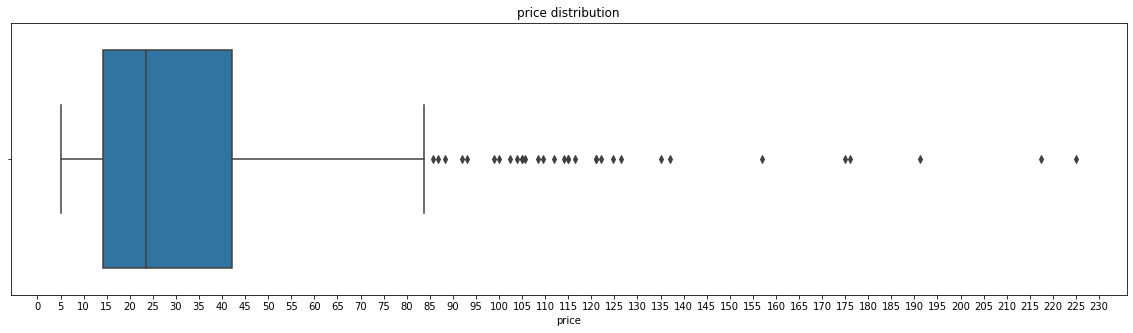

In [66]:
plt.figure(figsize=(20,5))
sns.boxplot(x = ca['price'])
plt.xticks(range(0,round(ca['price'].max()+10),5))
plt.title('price distribution')

Ce box plot nous informe que des outliers sont présents. Il convient de les identifier afin des'assurer qu'il ne sagisse pas de valeurs aberrantes.
Pour cela nous allons utiliser la méthodeinterquarile.

In [78]:
Q1 = ca['price'].quantile(0.25)
Q3 = ca['price'].quantile(0.75)
IQR = Q3-Q1

In [82]:
outliers = ca.loc[(ca['price'] <= Q1 - 1.5*IQR) | (ca['price'] >= Q3 + 1.5*IQR),:]

In [84]:
outliers.sort_values("price", ascending = False)

,product_id,post_title,total_sales,price,chiffre_affaire,zscore
199,4352,Champagne Egly-Ouriet Grand Cru Millésimé 2008,5.0,225.0,1125.0,6.922087
426,5001,David Duband Charmes-Chambertin Grand Cru 2014,0.0,217.5,0.0,6.652405
587,5892,Coteaux Champenois Egly-Ouriet Ambonnay Rouge ...,3.0,191.3,573.9,5.710315
218,4402,Cognac Frapin VIP XO,13.0,176.0,2288.0,5.160164
553,5767,Camille Giroud Clos de Vougeot 2016,0.0,175.0,0.0,5.124206
221,4406,Cognac Frapin Château de Fontpinot 1989 20 Ans...,0.0,157.0,0.0,4.476969
381,4904,Domaine Des Croix Corton Charlemagne Grand Cru...,5.0,137.0,685.0,3.757817
642,6126,Champagne Gosset Célébris Vintage 2007,2.0,135.0,270.0,3.685902
201,4355,Champagne Egly-Ouriet Grand Cru Blanc de Noirs,11.0,126.5,1391.5,3.380262
511,5612,Domaine Weinbach Gewurztraminer Grand Cru Furs...,0.0,124.8,0.0,3.319134


Pour les outliers observés, on constate des prix effectivement élevés, mais qui ne semble pas pour autant aberrant compte tenu du type de produits. De plus certains d'entre eux ont été vendus, on peut donc supposer qu'ils sont à un prix "standard".

Il ne faut donc pas les supprimer.

###Observation de la distribution des prix.

In [70]:

liste= list(range(0,round(ca["price"].max()+50),50))
liste.append(round(ca['price'].median(),2))
liste.append(round(ca['price'].mean(),2))


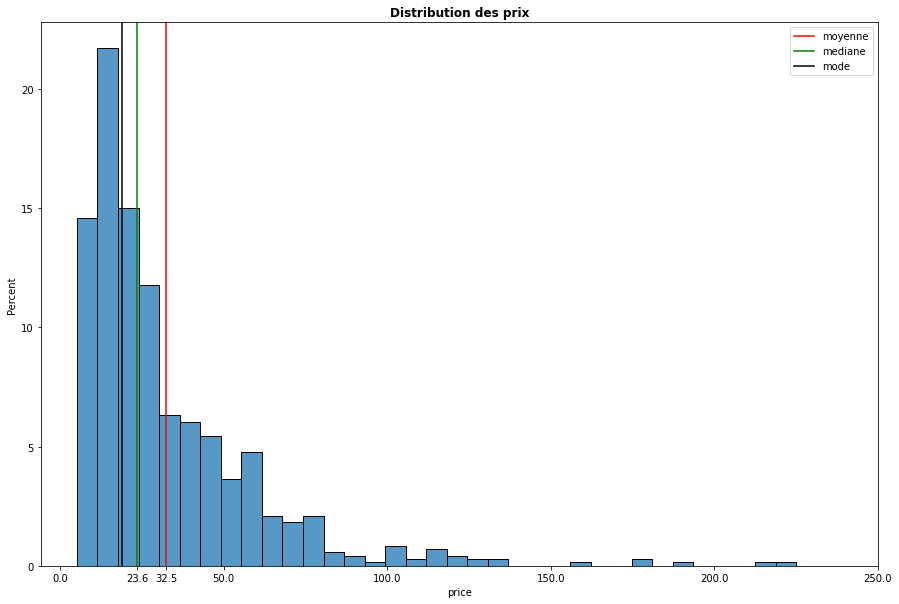

In [71]:
plt.figure(figsize=(15,10))
sns.histplot(data= ca['price'], stat= 'percent')
plt.axvline(ca['price'].mean(), color = 'red', label = 'moyenne')
plt.axvline(ca['price'].median(), color = 'green', label='mediane')
plt.axvline(ca['price'].mode()[0], color = "black", label = 'mode')
plt.xticks(liste)
plt.title('Distribution des prix', weight = 'bold')
plt.legend()


In [72]:
print("Le prix moyen d'une bouteille est de", round(ca['price'].mean(),2),"€")
print("Le prix médian d'une bouteille est de", round(ca['price'].median(),2),"€")
print("Le prix le plus fréquent d'une bouteille est de", round(ca['price'].mode()[0]),"€")

Le prix moyen d'une bouteille est de 32.49 €
Le prix médian d'une bouteille est de 23.55 €
Le prix le plus fréquent d'une bouteille est de 19 €


# Ouvertures: analyse des ventes/ca

Pour cette étude les produits vont être segmentés en déciles, afin de pouvoir observer leur poids dans les stocks, leurs poids dans les ventes et leur participation au CA.

In [85]:
data_2 = data.copy()
data_2["ca"]=data_2['total_sales']*data_2['price']

In [86]:
data_2['segment'] = pd.qcut(data_2['price'],10)

In [87]:
data_2 = data_2.groupby('segment').agg({"total_sales":"sum", "price": 'mean', "stock_quantity":"sum", "ca":"sum"})
data_2.columns = data_2.columns.get_level_values(0)
data_2.rename(columns = {'price':'price_mean'}, inplace=True)


In [88]:
data_2['pourcentage_des_ventes'] = round(data_2['total_sales']/data_2['total_sales'].sum()*100)
data_2['part_stock_vendu'] = round(data_2['total_sales']/data_2['stock_quantity']*100)
data_2['poids_dans_le_stock'] = round(data_2['stock_quantity']/data_2['stock_quantity'].sum()*100)
data_2['participation_ca'] = round((data_2['ca']/data_2['ca'].sum())*100)

In [89]:
data_2.head(10)

,total_sales,price_mean,stock_quantity,ca,pourcentage_des_ventes,part_stock_vendu,poids_dans_le_stock,participation_ca
segment,,,,,,,,
"(5.199, 9.9]",650.0,8.162667,6914,5112.3,23.0,9.0,34.0,7.0
"(9.9, 12.8]",283.0,11.637143,2724,3303.9,10.0,10.0,13.0,5.0
"(12.8, 16.1]",306.0,14.277857,2584,4301.1,11.0,12.0,13.0,6.0
"(16.1, 19.0]",259.0,17.529870,1933,4454.3,9.0,13.0,9.0,6.0
"(19.0, 23.55]",310.0,21.362308,1637,6651.1,11.0,19.0,8.0,9.0
"(23.55, 28.4]",305.0,26.016667,1812,7859.4,11.0,17.0,9.0,11.0
"(28.4, 37.73]",180.0,32.504225,1020,5800.0,6.0,18.0,5.0,8.0
"(37.73, 48.74]",191.0,42.677465,810,8120.8,7.0,24.0,4.0,12.0
"(48.74, 62.47]",297.0,55.464789,521,15207.7,10.0,57.0,3.0,22.0


Ce tableau nous permet de constater:
- que les produits les moins chers représentent une part importante des stocks et des ventes.
- que les produits les moins cher ne réprésentent qu'une participation "faible", par rapport à leur poids dans les ventes, au CA.

Il serait intéressant de connaître la marge de chacun des produits pour tirer des conclusions définitives, mais il semblerait que la sélection des produits et la gestion des stocks puisse être optimisée.